In [1]:
# Author: Van Hoan Do <vanhoan310@gmail.com>
# License: BSD 3 clause (C) 2020
from numpy import genfromtxt
import numpy as np 
import matplotlib
import pylab as plt
import pandas as pd
from Jvis import UMAP, JUMAP

In [2]:
rna_matrix = np.genfromtxt('data/cbmc_rna_pca.csv', delimiter=',')
adt_matrix = np.genfromtxt('data/cbmc_adt.csv', delimiter=',')

In [3]:
# method = 'CiteFuse' # 'CiteFuse'
method = 'Specter' # 'Specter'
if method == 'Specter':
    y = np.genfromtxt('data/cbmc_jointspecter_labels.csv', delimiter=',')
    cell_types = ["NK", "pDCs", "Eryth", "CD8+ T", "CD14+ Mono.", "CD4+ T", "DC", "CD34+", "CD16+ Mono.", "MK", "B"] #specter
else:
    y = np.genfromtxt('data/cbmc_citefuse_labels.csv', delimiter=',')
    cell_types = ["CD4+ T", "CD14+ Mono", "B", "NK", "CD34+", "pDCs", "CD8+ T", "CD16+ Mono.", "Eryth", "DC"] # citefuse
labels_true = y.astype(int)

In [4]:
# run umap 
dpi = 200
# dpi = 50
title_fz = 12
metrics = 'euclidean'
n_NN = 15
min_dist = 0.1

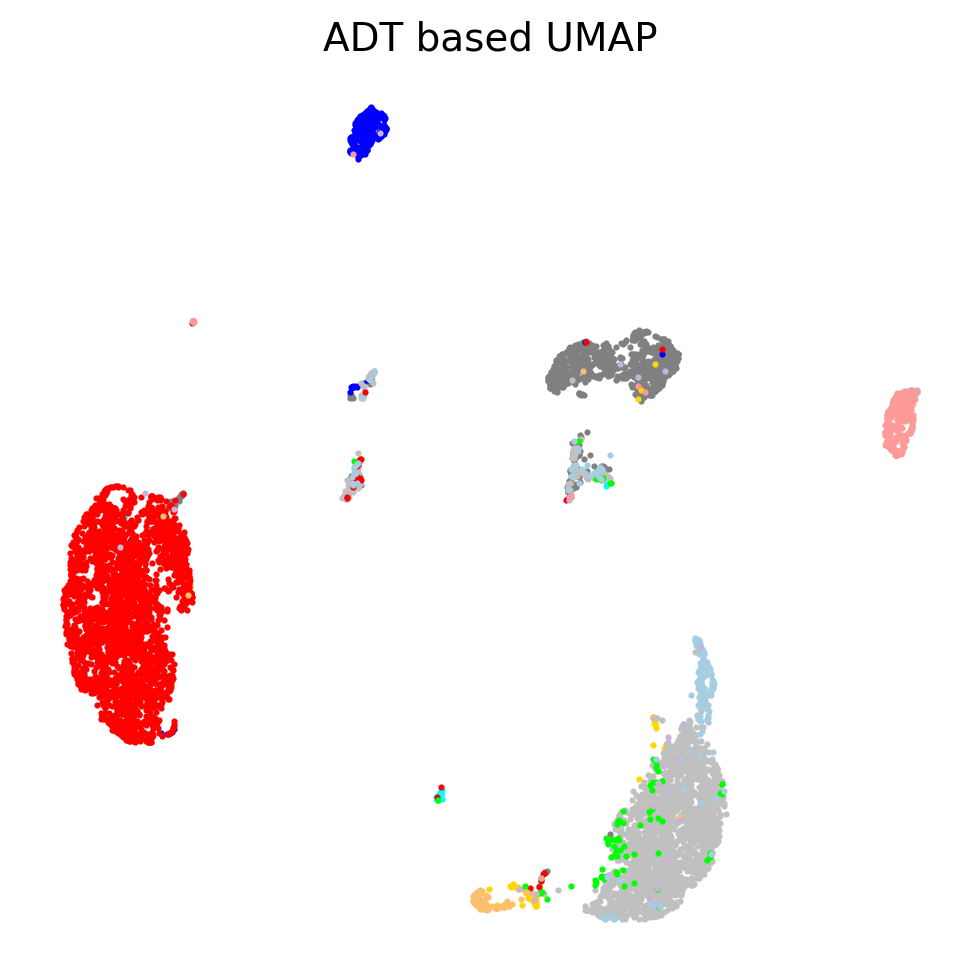

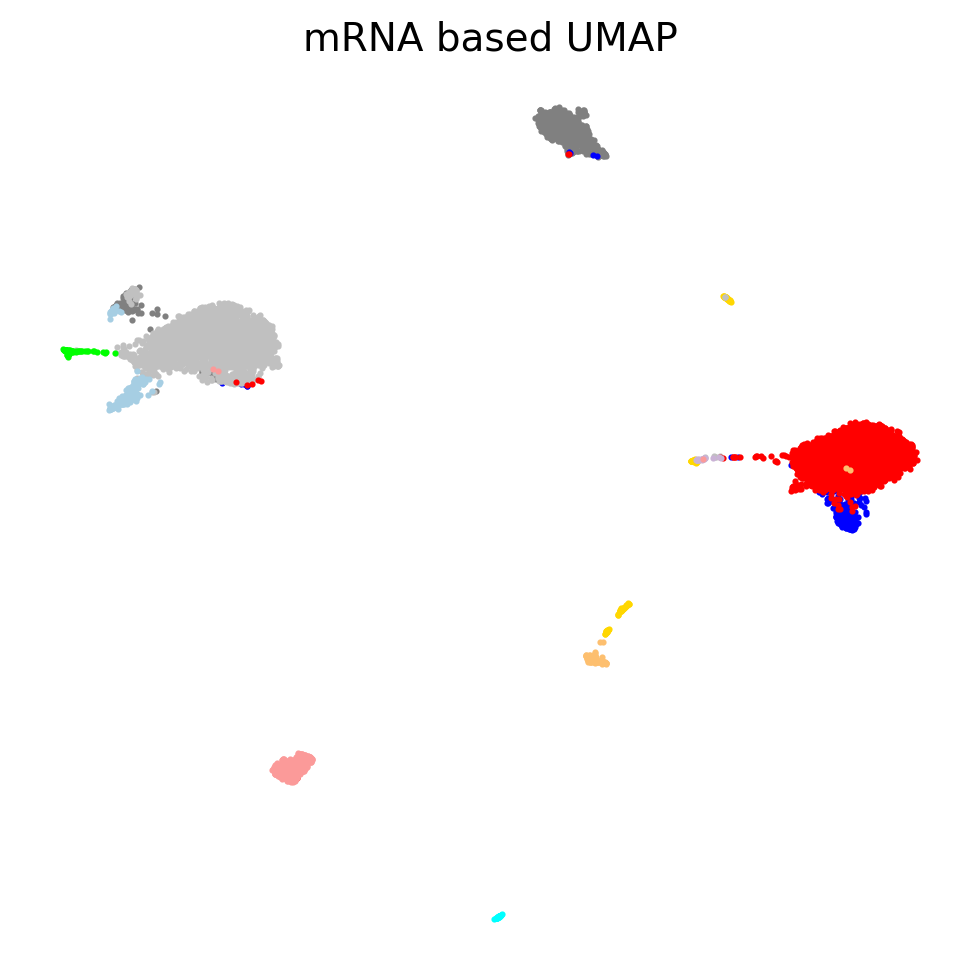

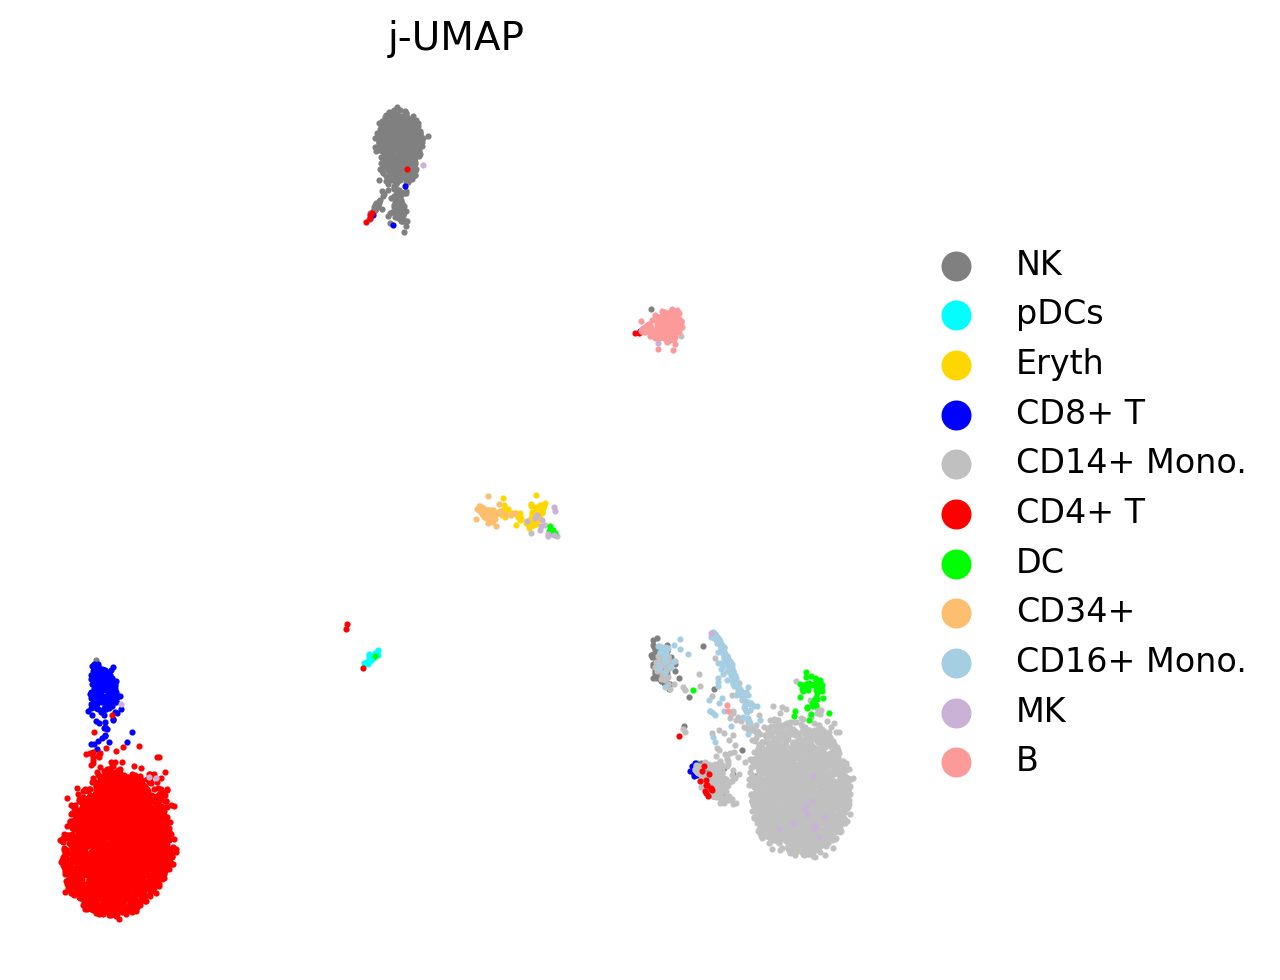

In [9]:
for alpha in [0.0, 1.0, 0.5]:
# for alpha in [1.0]:
    if alpha == 1.0:
        Z = UMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.5).fit_transform(rna_matrix)
    elif alpha == 0.0:
        Z = UMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.5).fit_transform(adt_matrix)
    else:
#         Z = JUMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.5).fit_transform(X = {'adt': adt_matrix, 'rna': rna_matrix}, method = "auto", ld = 1.0)
        Z = JUMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.5).fit_transform(X = {'adt': adt_matrix, 'rna': rna_matrix})

    #loop through labels and plot each cluster
    data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})
#     colors = ['black', 'cyan', 'gold', 'magenta', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','#fb9a99','tomato', 'olive',
#                      'cyan','black', 'gold', 'magenta', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','#fb9a99','tomato', 'olive']
#     colors_map = {"NK":'black', "pDCs":'cyan', "Eryth":'gold', "CD8+ T":'magenta', "CD14+ Mono.":'blue', 
#                   "CD4+ T":'silver', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono.":'#a6cee3', "MK":'#cab2d6', "B":'#fb9a99'}
    colors_map = {"NK":'gray', "pDCs":'cyan', "Eryth":'gold', "CD8+ T":'blue', "CD14+ Mono.":'silver', 
                  "CD4+ T":'red', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono.":'#a6cee3', "MK":'#cab2d6', "B":'#fb9a99'}
    if method == 'Specter':
        cell_types = ["NK", "pDCs", "Eryth", "CD8+ T", "CD14+ Mono.", "CD4+ T", "DC", "CD34+", "CD16+ Mono.", "MK", "B"] #specter
    else:
        cell_types = ["CD4+ T", "CD14+ Mono.", "B", "NK", "CD34+", "pDCs", "CD8+ T", "CD16+ Mono.", "Eryth", "DC"] # citefuse
    figwidth = 6.5 if alpha==0.5 else 5
    plt.figure(figsize=(figwidth, 5), dpi = dpi)
    for label in range(1, len(np.unique(labels_true))+1, 1):
        # add data points 
        i = label-1
        plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                    y=data2.loc[data2['label']==label,'y'], 
                    color=colors_map[cell_types[i]], 
                    alpha=1, s = 1.5, label = cell_types[i])
        plt.tight_layout()
        if alpha == 1.0:
            plt.title("mRNA based UMAP", fontdict = {'fontsize' : title_fz+2})
        elif alpha == 0.0:
            plt.title("ADT based UMAP", fontdict = {'fontsize' : title_fz+2})
        else:
            plt.title("j-UMAP", fontdict = {'fontsize' : title_fz+2})
            plt.legend(loc='center left', numpoints=1, ncol=1, fontsize=title_fz, markerscale=title_fz-4, frameon=False, bbox_to_anchor=(1, 0.5))
        plt.axis('off')    
    if alpha == 1.0:
        plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedUMAP.pdf', dpi = dpi)
    elif alpha == 0.0:
        plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_ADTbasedUMAP.pdf', dpi = dpi)
    else:
        plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_jointUMAP.pdf', dpi = dpi)
    plt.show()

In [10]:
Z = UMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.5).fit_transform(rna_matrix)
data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})

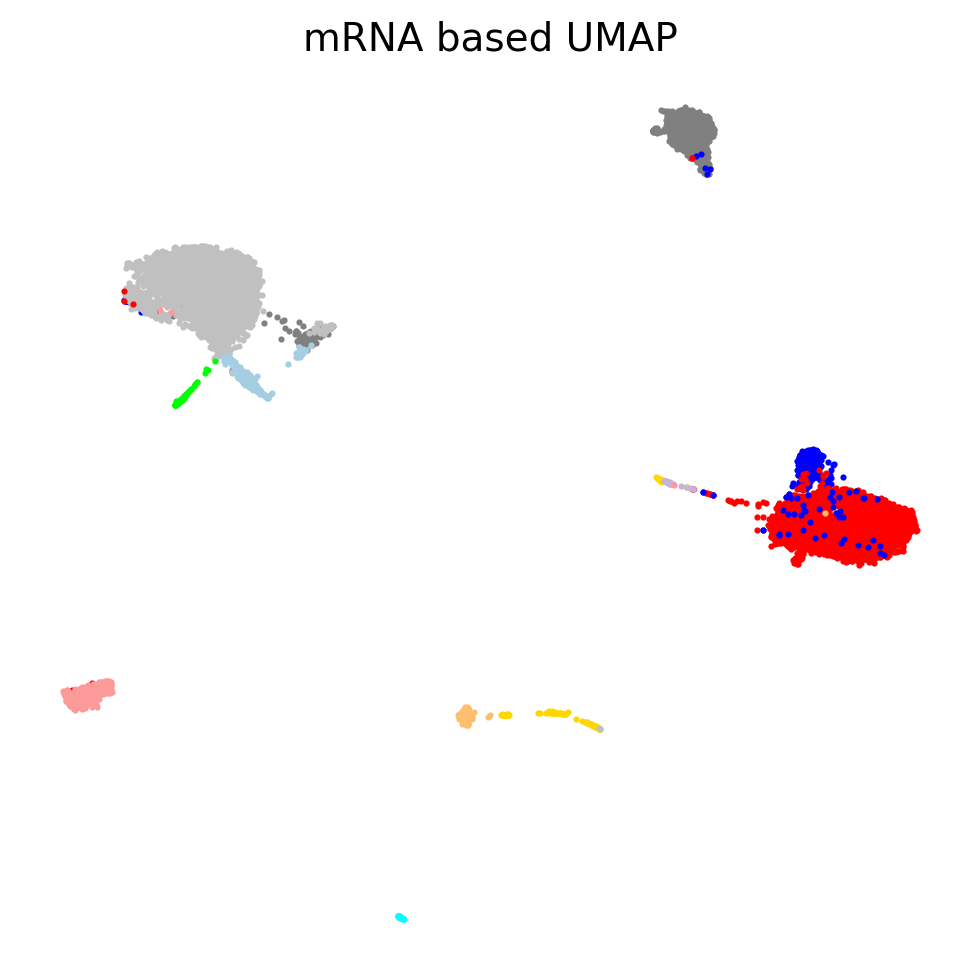

In [17]:
alpha = 1.0
if method == 'Specter':
    cell_types = ["NK", "pDCs", "Eryth", "CD8+ T", "CD14+ Mono.", "CD4+ T", "DC", "CD34+", "CD16+ Mono.", "MK", "B"] #specter
else:
    cell_types = ["CD4+ T", "CD14+ Mono.", "B", "NK", "CD34+", "pDCs", "CD8+ T", "CD16+ Mono.", "Eryth", "DC"] # citefuse
figwidth = 6.5 if alpha==0.5 else 5
plt.figure(figsize=(figwidth, 5), dpi = dpi)
for label in range(1, len(np.unique(labels_true))+1, 1):
    # add data points 
    i = label-1
    plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                y=data2.loc[data2['label']==label,'y'], 
                color=colors_map[cell_types[i]], 
                alpha=1, s = 1.5, label = cell_types[i])
    plt.tight_layout()
    plt.title("mRNA based UMAP", fontdict = {'fontsize' : title_fz+2})
    plt.axis('off')
label = 4
i = label-1
x=data2.loc[data2['label']==label, 'x']
y=data2.loc[data2['label']==label,'y']
selected_cells = y < 7
plt.scatter(x = x[selected_cells], 
            y=y[selected_cells], 
            color=colors_map[cell_types[i]], 
            s = 1.5, label = cell_types[i])

plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedUMAP.pdf', dpi = dpi)
plt.show()

## Compute KNI and CARI metrics on 4 clusters: CD4, CD8, CD14, DCs

In [5]:
# Specter label
specter_labels = np.genfromtxt('data/cbmc_jointspecter_labels.csv', delimiter=',').astype(int)
specter_labels = specter_labels - min(specter_labels) # reindex to start from 0
cell_types = ["NK", "pDCs", "Eryth", "CD8 T", "CD14+ Mono", "CD4 T", "DC", "CD34+", "CD16+ Mono", "MK", "B"] #specter
subtypes = ["CD8 T", "CD14+ Mono", "CD4 T", "DC"]
subtypes_index = [3, 4, 5, 6]

In [6]:
# Citefuse
citefuse_labels = np.genfromtxt('data/cbmc_citefuse_labels.csv', delimiter=',').astype(int)
citefuse_labels = citefuse_labels - min(citefuse_labels) # reindex to start from 0
cell_types2 = ["CD4 T", "CD14+ Mono", "B", "NK", "CD34+", "pDCs", "CD8 T", "CD16+ Mono", "Eryth", "DC"] # citefuse
subtypes_index2 = [0, 1, 6, 9]

In [7]:
cd8 = (specter_labels==3) * (citefuse_labels==6)

In [8]:
cd4 = (specter_labels==5) * (citefuse_labels==0)

In [9]:
cd14 = (specter_labels==4) * (citefuse_labels==1)

In [10]:
dc = (specter_labels==6) * (citefuse_labels==9)

In [11]:
subtypes_cells = cd8 + cd4 +cd14 + dc

In [12]:
sum(subtypes_cells)

5599

In [13]:
subtypes_labels_level = cd8.astype(int) + 2* cd4.astype(int) + 3*cd14.astype(int) + 4*dc.astype(int)

In [14]:
subtypes_labels = subtypes_labels_level[subtypes_labels_level>0]

In [15]:
len(subtypes_labels)

5599

In [16]:
# RNA based tSNE
umap_rna = UMAP().fit_transform(rna_matrix)

In [17]:
sub_umap_rna = umap_rna[subtypes_cells==1]

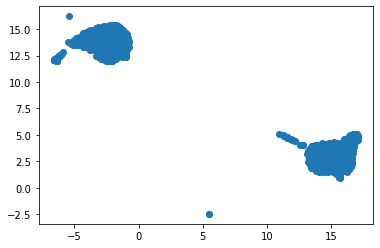

In [18]:
plt.scatter(sub_umap_rna[:,0], sub_umap_rna[:, 1])
plt.show()

In [19]:
from sklearn import metrics
#from c_index import (calc_c_index, calc_cindex_clusterSim_implementation)
metrics_name = 'silhouette_score'
def my_metric(X, labels):
#     D = metrics.pairwise_distances(X)
#     return calc_c_index(X, labels)
    if metrics_name == 'calinski_harabasz_score':
        return(metrics.calinski_harabasz_score(X, labels))
    elif metrics_name == 'silhouette_score':
        return(metrics.silhouette_score(X, labels))
    else:
        print("Not implemented yet!")

In [20]:
## Compute two metrics
from joint_metrics import *
kNN = 10
KNI_metrics = KNI(sub_umap_rna, subtypes_labels, kNN)
# CARI_metrics = CARI(sub_umap_rna, subtypes_labels)
print("KNI: ", KNI_metrics, ", Silhou: ", my_metric(sub_umap_rna, subtypes_labels))

/home/vanhoan310/miniconda3/envs/tsne/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


KNI:  0.9806036792284336 , Silhou:  0.48748234


In [22]:
# ADT based tSNE
umap_adt = UMAP().fit_transform(adt_matrix)

In [23]:
sub_umap_adt = umap_adt[subtypes_cells==1]

In [24]:
KNI_metrics = KNI(sub_umap_adt, subtypes_labels, kNN)
# CARI_metrics = CARI(sub_umap_adt, subtypes_labels)
print("KNI: ", KNI_metrics, ", Silhou: ", my_metric(sub_umap_adt, subtypes_labels))

KNI:  0.9824611537774602 , Silhou:  0.46821848


In [25]:
# joint TSNE
joint_umap = JUMAP().fit_transform(X = {'rna': rna_matrix, 'adt': adt_matrix})

In [26]:
sub_joint_umap = joint_umap[subtypes_cells==1]

In [27]:
## Compute two metrics
KNI_metrics = KNI(sub_joint_umap, subtypes_labels, kNN)
# CARI_metrics = CARI(sub_joint_umap, subtypes_labels)
print("KNI: ", KNI_metrics, ", Silhou: ", my_metric(sub_joint_umap, subtypes_labels))

KNI:  0.9966779782103947 , Silhou:  0.5780166
